In [1]:
import matplotlib.pyplot as plt
import ast
import numpy as np

In [68]:
def parse_logs(rewriter, ansatz):
    logfile=f"./logs/10_31_02:28/{ansatz}_{rewriter}.log"
    # logfile=f"./logs/Feb11_17-51-39/{ansatz}_{rewriter}.log"
    with open(logfile) as f:
        f.readline()
        f.readline()
        train_losses=f.readline().strip()
        train_losses = ast.literal_eval(train_losses)
        f.readline()
        val_losses=f.readline().strip()
        val_losses = ast.literal_eval(val_losses)
        f.readline()
        train_acc=f.readline().strip()
        train_acc = ast.literal_eval(train_acc)
        f.readline()
        val_acc=f.readline().strip()
        val_acc = ast.literal_eval(val_acc)
    return train_losses,train_acc,val_losses,val_acc

In [29]:
def parse_hyper_logs(n_layers, n_single_qubit_params):
    logfile=f"./logs/01_01_04:50/iqp/{n_layers}_{n_single_qubit_params}.log"
    with open(logfile) as f:
        f.readline()
        f.readline()
        train_loss=ast.literal_eval(f.readline().strip())
        f.readline()
        val_loss=ast.literal_eval(f.readline().strip())
        f.readline()
        train_acc=ast.literal_eval(f.readline().strip())
        f.readline()
        val_acc=ast.literal_eval(f.readline().strip())
    return train_loss,val_loss,train_acc,val_acc

In [30]:
def calculate_mean_loss_acc(rewriter, ansatz):
    train_losses,train_acc,val_losses,val_acc=parse_logs(rewriter, ansatz)
    return np.mean(train_losses[-10:]),np.mean(train_acc[-10:]),np.mean(val_losses[-10:]),np.mean(val_acc[-10:])

In [31]:
def calculate_mean_acc(n_layers, n_single_qubit_params):
    val_acc=parse_hyper_logs(n_layers, n_single_qubit_params)
    return np.mean(val_acc[-10:])

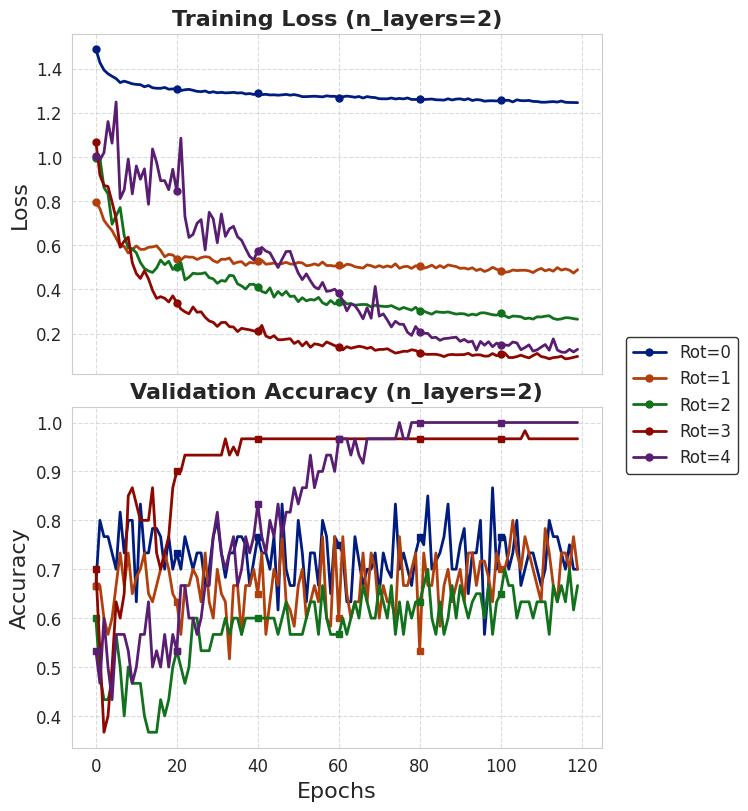

In [71]:
# Set professional style
sns.set_style("whitegrid")
colors = sns.color_palette("dark", 5)  # Professional dark palette

def plot_n_layers_2():
    n_layers = 2
    n_single_qubit_params_list = [0, 1, 2, 3, 4]

    # Create figure with reduced width
    fig, axs = plt.subplots(2, 1, figsize=(6, 8), sharex=True, constrained_layout=True)
    font_size = 16  

    handles = []
    labels = []

    for i, n_single_qubit_params in enumerate(n_single_qubit_params_list):
        # Get the data
        train_loss, val_loss, train_acc, val_acc = parse_hyper_logs(n_layers, n_single_qubit_params)

        # Plot train loss
        loss_line, = axs[0].plot(range(len(train_loss)), train_loss, 
                                 label=f"Rot={n_single_qubit_params}", 
                                 color=colors[i], linewidth=2, linestyle="-", marker='o', markersize=5, markevery=20)

        # Plot validation accuracy
        acc_line, = axs[1].plot(range(len(val_acc)), val_acc, 
                                label=f"Rot={n_single_qubit_params}", 
                                color=colors[i], linewidth=2, linestyle='-', marker='s', markersize=5, markevery=20)

        handles.append(loss_line)
        labels.append(f"Rot={n_single_qubit_params}")

    # Apply dashed grid lines
    for ax in axs:
        ax.grid(True, linestyle="--", alpha=0.7)

    # Customize loss plot
    axs[0].set_title(f"Training Loss (n_layers={n_layers})", fontsize=font_size, fontweight='bold')
    axs[0].set_ylabel("Loss", fontsize=font_size)
    axs[0].tick_params(axis='both', labelsize=12)

    # Customize accuracy plot
    axs[1].set_title(f"Validation Accuracy (n_layers={n_layers})", fontsize=font_size, fontweight='bold')
    axs[1].set_xlabel("Epochs", fontsize=font_size)
    axs[1].set_ylabel("Accuracy", fontsize=font_size)
    axs[1].tick_params(axis='both', labelsize=12)

    # Move legend **completely outside** the plots
    fig.legend(handles, labels, loc="center left", bbox_to_anchor=(1.02, 0.5), fontsize=12, frameon=True, fancybox=True, edgecolor='black')

    # Save figure with tight bounding box
    plt.savefig(f"plots/loss_accuracy_n_layers_{n_layers}.png", bbox_inches="tight", dpi=300)
    plt.show()

# Example usage
plot_n_layers_2()

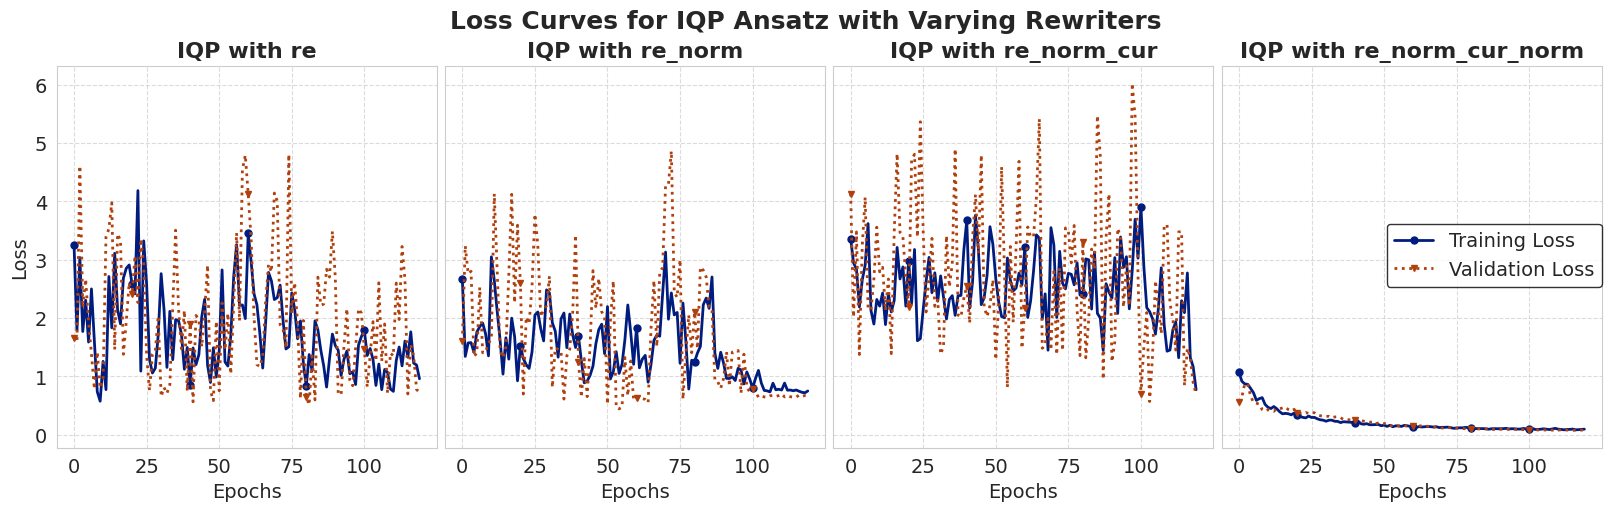

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set professional style
sns.set_style("whitegrid")
colors = sns.color_palette("dark", 4)  # Professional dark palette

def plot_iqp_rewriters_logs(rewriters, ansatz):
    fig, axs = plt.subplots(1, len(rewriters), figsize=(16, 5), sharex=True, sharey=True, constrained_layout=True)

    handles = []  # Store line handles for a single legend

    for i, rewriter in enumerate(rewriters):
        # Parse the log file for training and validation losses
        train_losses, _, val_losses, _ = parse_logs(rewriter, ansatz)

        # Plot training loss with markers
        train_line, = axs[i].plot(train_losses, label="Training Loss", linewidth=2, linestyle="-", color=colors[0], marker='o', markersize=5, markevery=20)
        val_line, = axs[i].plot(val_losses, label="Validation Loss", linewidth=2, linestyle=':', color=colors[1], marker='v', markersize=5, markevery=20)

        # Apply dashed grid lines
        axs[i].grid(True, linestyle="--", alpha=0.7)

        # Store handles only once for a single legend
        if i == 0:
            handles.extend([train_line, val_line])
        
        # Formatting
        axs[i].set_title(f"IQP with {rewriter}", fontsize=16, fontweight='bold')
        axs[i].set_xlabel("Epochs", fontsize=14)
        axs[i].tick_params(axis='both', which='major', labelsize=14)

    # Y-label for first subplot
    axs[0].set_ylabel("Loss", fontsize=14)

    # Add a single legend outside the subplots
    fig.legend(handles=handles, labels=["Training Loss", "Validation Loss"], loc="center right", fontsize=14, frameon=True, fancybox=True, edgecolor='black')

    # Set overall title
    fig.suptitle("Loss Curves for IQP Ansatz with Varying Rewriters", fontsize=18, fontweight='bold')

    # Save and show the figure
    plt.savefig("plots/IQPAnsatz_loss_plots.png", bbox_inches="tight", dpi=300)
    plt.show()

# Example usage
rewriters = ["re", "re_norm", "re_norm_cur", "re_norm_cur_norm"]
ansatz = "IQPAnsatz"
plot_iqp_rewriters_logs(rewriters, ansatz)

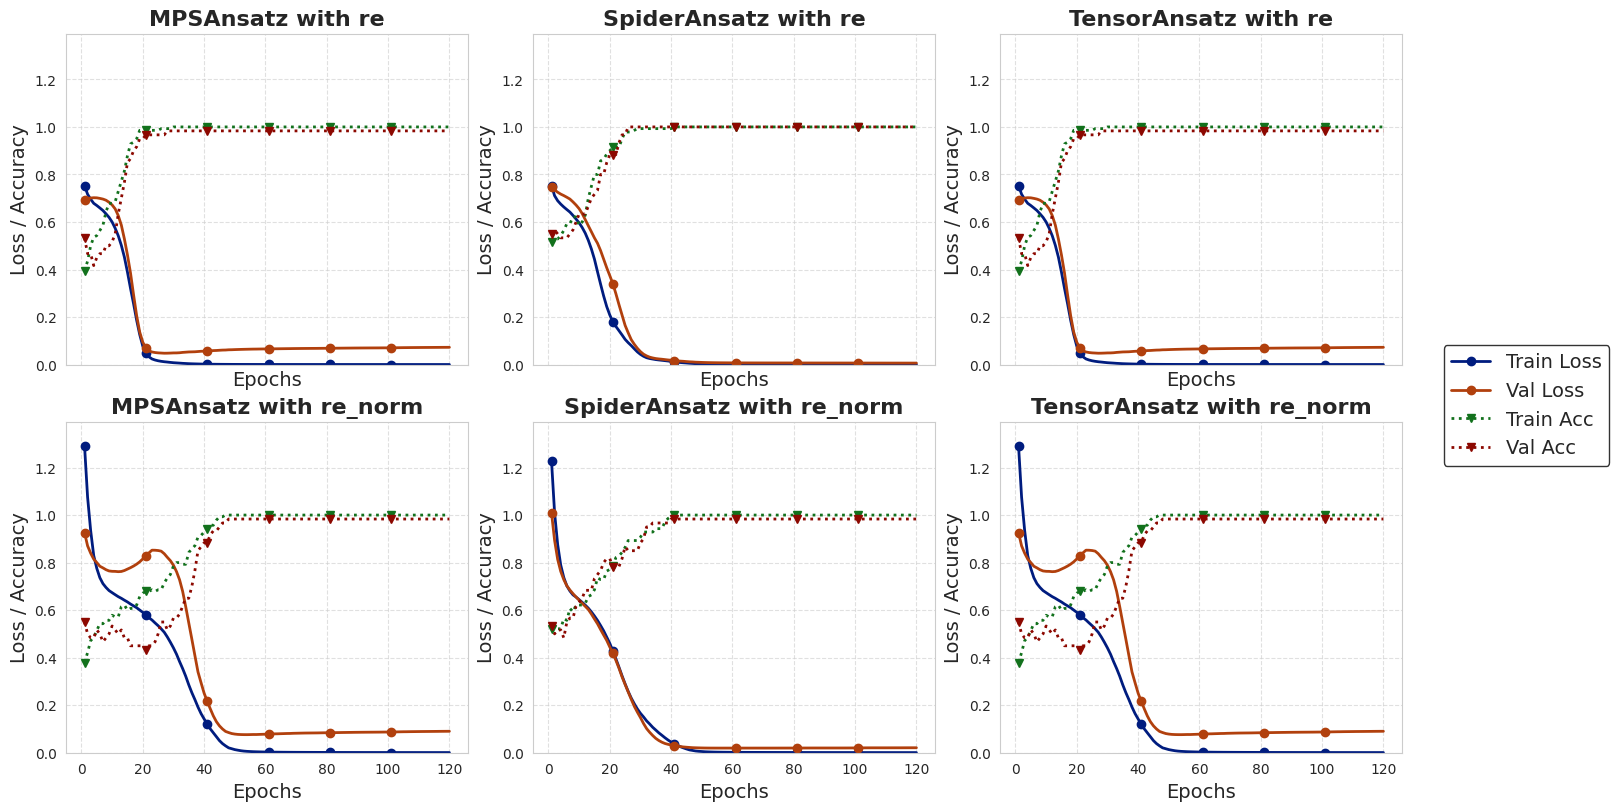

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set professional style
sns.set_style("whitegrid")
colors = sns.color_palette("dark", 4)  # Professional color scheme with distinct colors

def plot_tensor_logs(rewriters, ansatzes):
    fig, axes = plt.subplots(2, 3, figsize=(14, 8), sharex=True, constrained_layout=True)
    epochs = np.arange(1, 121)

    handles, labels = [], []

    # Determine global y-axis limits for uniformity
    max_loss = 0
    max_acc = 1.0  # Accuracy is always between 0 and 1

    for ansatz in ansatzes:
        for rewriter in rewriters:
            train_loss, train_acc, val_loss, val_acc = parse_logs(rewriter, ansatz)
            max_loss = max(max_loss, np.max(train_loss), np.max(val_loss))

    for col, ansatz in enumerate(ansatzes):
        for row, rewriter in enumerate(rewriters):
            train_loss, train_acc, val_loss, val_acc = parse_logs(rewriter, ansatz)
            ax = axes[row, col]

            # Set unified y-axis limits
            ax.set_ylim(0, max(max_acc, max_loss) + 0.1)

            # Plot with distinct line styles and markers
            l1, = ax.plot(epochs, train_loss, label="Train Loss", linestyle="-", color=colors[0], linewidth=2, marker='o', markevery=20)
            l2, = ax.plot(epochs, val_loss, label="Val Loss", linestyle="-", color=colors[1], linewidth=2, marker='o', markevery=20)
            l3, = ax.plot(epochs, train_acc, label="Train Acc", linestyle=":", color=colors[2], linewidth=2, marker='v', markevery=20)
            l4, = ax.plot(epochs, val_acc, label="Val Acc", linestyle=":", color=colors[3], linewidth=2, marker='v', markevery=20)

            ax.set_title(f"{ansatz} with {rewriter}", fontsize=16, fontweight="bold")
            ax.set_xlabel("Epochs", fontsize=14)
            ax.set_ylabel("Loss / Accuracy", fontsize=14)
            ax.grid(True, linestyle="--", alpha=0.6)

            # Store handles and labels for a single, unified legend
            if col == 0 and row == 0:
                handles.extend([l1, l2, l3, l4])
                labels.extend(["Train Loss", "Val Loss", "Train Acc", "Val Acc"])

    # Move legend outside the subplots
    fig.legend(handles, labels, loc="center left", bbox_to_anchor=(1.02, 0.5), fontsize=14, frameon=True, fancybox=True, edgecolor='black')

    # Save and display the figure
    plt.savefig("plots/tensor_ansatz_performance.png", bbox_inches="tight", dpi=300)
    plt.show()

# Example usage
rewriters = ["re", "re_norm"]
ansatzes = ["MPSAnsatz", "SpiderAnsatz", "TensorAnsatz"]
plot_tensor_logs(rewriters, ansatzes)


In [56]:
rewriters = ["re", "re_norm", "re_norm_cur", "re_norm_cur_norm"]
ansatzes = [
    "IQPAnsatz",
    "StronglyEntanglingAnsatz",
    "Sim14Ansatz",
    "Sim15Ansatz"
]
for rewriter in rewriters:
    print("\nRewriter: ",rewriter)
    for ansatz in ansatzes:
        print("Ansatz: ",ansatz)
        print(calculate_mean_loss_acc(rewriter,ansatz))


Rewriter:  re
Ansatz:  IQPAnsatz
(1.2782435890736348, 0.64, 1.6914993661288793, 0.5816666666666667)
Ansatz:  StronglyEntanglingAnsatz
(1.7489887171351988, 0.5721428571428572, 1.8369887701740915, 0.4966666666666667)
Ansatz:  Sim14Ansatz
(1.530561858977722, 0.5657142857142856, 2.021770880609254, 0.5983333333333333)
Ansatz:  Sim15Ansatz
(1.818358619060532, 0.6371428571428571, 1.86034809558473, 0.6250000000000001)

Rewriter:  re_norm
Ansatz:  IQPAnsatz
(0.7649545481262502, 0.5007142857142857, 0.6640575056691999, 0.545)
Ansatz:  StronglyEntanglingAnsatz
(1.8594463385992832, 0.5257142857142857, 1.911507549689396, 0.49333333333333335)
Ansatz:  Sim14Ansatz
(1.8651845061760972, 0.5471428571428572, 1.7377013141008408, 0.5483333333333332)
Ansatz:  Sim15Ansatz
(1.9754297304638022, 0.5942857142857143, 2.401985395210658, 0.5133333333333334)

Rewriter:  re_norm_cur
Ansatz:  IQPAnsatz
(1.6930821351279957, 0.5678571428571428, 1.7881020863543788, 0.505)
Ansatz:  StronglyEntanglingAnsatz
(2.474081049723

In [8]:
rewriters = ["re", "re_norm"]
ansatzes = [
    "MPSAnsatz",
    "SpiderAnsatz",
    "TensorAnsatz"
]
for rewriter in rewriters:
    print("\nRewriter: ",rewriter)
    for ansatz in ansatzes:
        print("Ansatz: ",ansatz)
        print(calculate_mean_loss_acc(rewriter,ansatz))


Rewriter:  re
Ansatz:  MPSAnsatz
(0.00029625067618326283, 1.0, 0.0723327487707138, 0.9833334684371948)
Ansatz:  SpiderAnsatz
(0.00023768579939617294, 1.0, 0.006353884655982256, 1.0)
Ansatz:  TensorAnsatz
(0.00029625067631838776, 1.0, 0.07233274802565574, 0.9833334684371948)

Rewriter:  re_norm
Ansatz:  MPSAnsatz
(0.0007455379445413461, 1.0, 0.0897421345114708, 0.9833334684371948)
Ansatz:  SpiderAnsatz
(0.0006158110410332743, 1.0, 0.020771528221666814, 0.9833334684371948)
Ansatz:  TensorAnsatz
(0.0007455382663985281, 1.0, 0.08974212929606437, 0.9833334684371948)


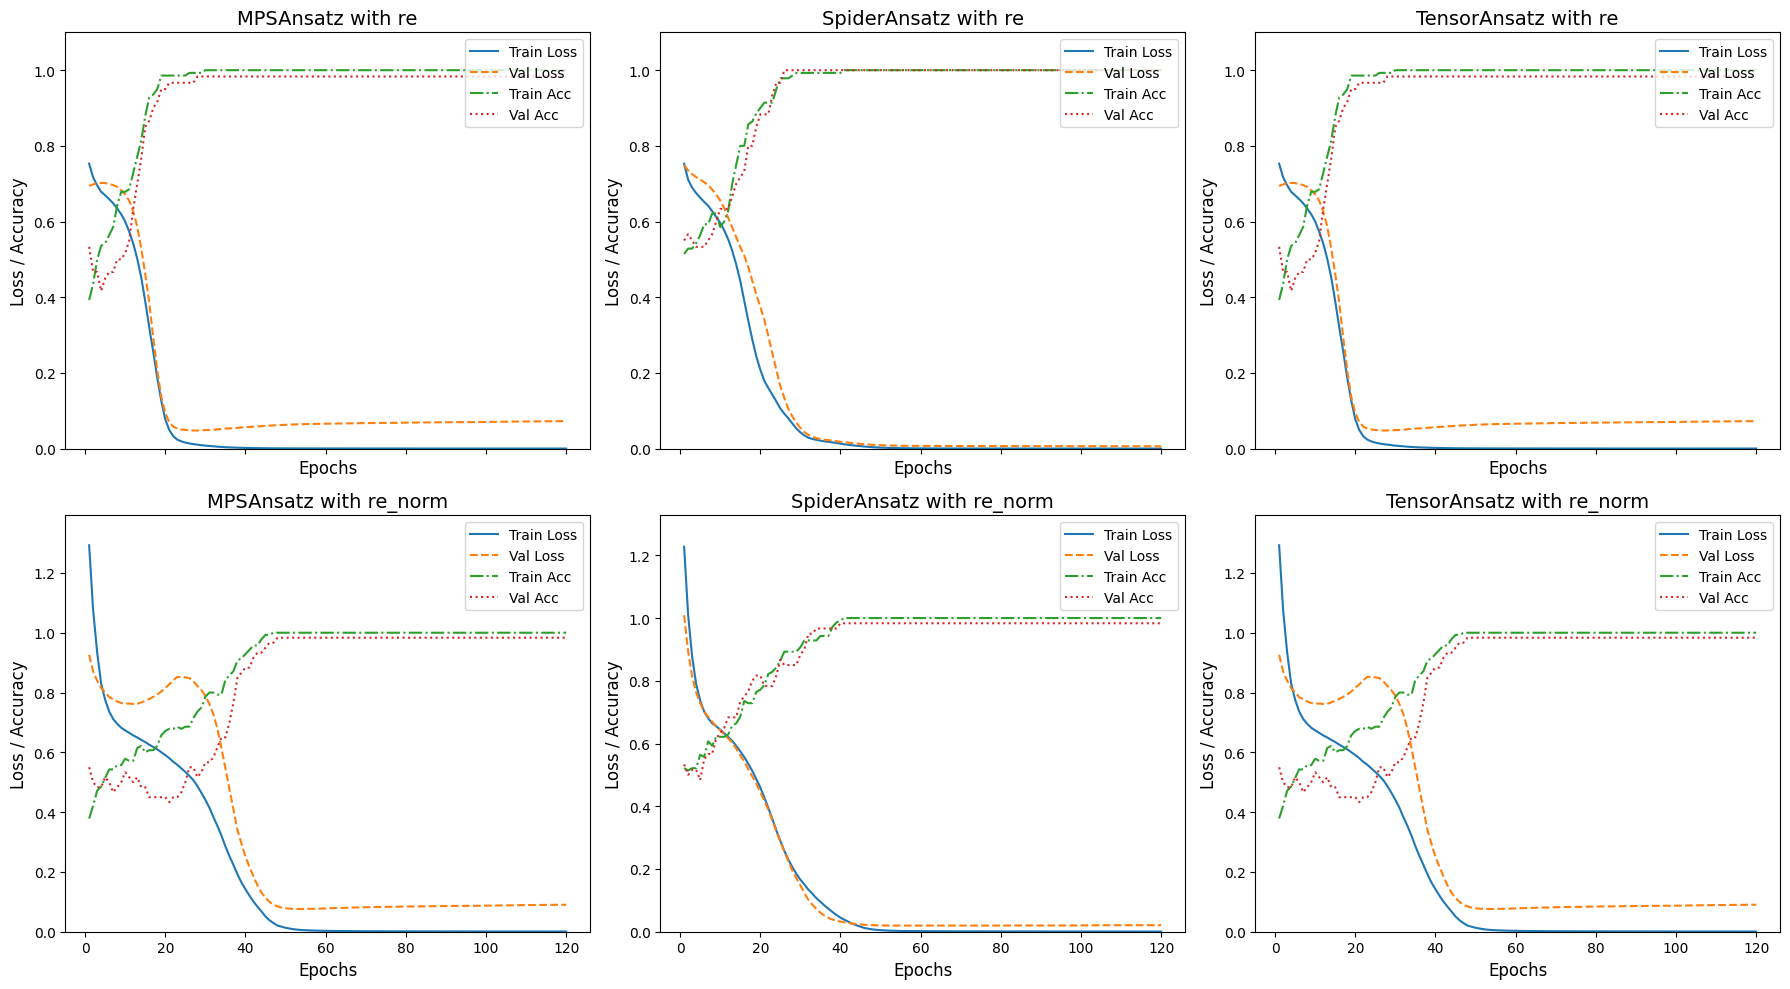

In [22]:
rewriters = ["re", "re_norm"]
ansatzes = [
    "MPSAnsatz",
    "SpiderAnsatz",
    "TensorAnsatz"
]
plot_tensor_logs(rewriters,ansatzes)

In [11]:
n_layers=[0,1,2,3,4]
n_single_qubit_params=[0,1,2,3,4]

for n_layer in n_layers:
    for n_single in n_single_qubit_params:
        if n_layer==0 and n_single==0:
            continue
        print(f"n_layers: {n_layer}, n_single_qubit_params: {n_single}")
        print(f"Val Accuracy: {calculate_mean_acc(n_layer, n_single)}\n")

n_layers: 0, n_single_qubit_params: 1
Val Accuracy: 0.42333333333333334

n_layers: 0, n_single_qubit_params: 2
Val Accuracy: 0.35

n_layers: 0, n_single_qubit_params: 3
Val Accuracy: 0.3466666666666667

n_layers: 0, n_single_qubit_params: 4
Val Accuracy: 0.49333333333333335

n_layers: 1, n_single_qubit_params: 0
Val Accuracy: 0.6833333333333333

n_layers: 1, n_single_qubit_params: 1
Val Accuracy: 0.9666666666666666

n_layers: 1, n_single_qubit_params: 2
Val Accuracy: 0.49000000000000005

n_layers: 1, n_single_qubit_params: 3
Val Accuracy: 0.8266666666666665

n_layers: 1, n_single_qubit_params: 4
Val Accuracy: 0.8533333333333335

n_layers: 2, n_single_qubit_params: 0
Val Accuracy: 0.7283333333333334

n_layers: 2, n_single_qubit_params: 1
Val Accuracy: 0.7083333333333333

n_layers: 2, n_single_qubit_params: 2
Val Accuracy: 0.6416666666666667

n_layers: 2, n_single_qubit_params: 3
Val Accuracy: 0.9666666666666666

n_layers: 2, n_single_qubit_params: 4
Val Accuracy: 1.0

n_layers: 3, n_sin